<a href="https://colab.research.google.com/github/shashikumar1998/Crop-Yield-Predition/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fast_ml --quiet
!pip install daal==2021.4.0 numpy==1.18.5 protobuf==3.20.3
!pip install tensorflow


In [ ]:
from fast_ml.model_development import train_valid_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\shash\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df = pd.read_csv('transformed_pc.CSV')

In [ ]:
df.describe()

,Unnamed: 0,crop_flow_lb_s,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
count,350445.000000,350445.000000,350445.000000,350445.000000,350445.000000,3.504450e+05,3.504450e+05,3.504450e+05,3.504450e+05,3.504450e+05,3.504450e+05,3.504450e+05,350445.000000,350445.000000
mean,175222.000000,5.743898,0.334931,0.309789,0.355280,-1.503831e-14,-7.815422e-15,-2.396762e-15,1.222064e-15,-1.790680e-15,2.358913e-15,-2.505889e-15,9.119211,2009.170107
std,101164.901881,4.287287,0.471967,0.462407,0.478599,2.396261e+00,1.471472e+00,1.398188e+00,9.322872e-01,8.216129e-01,7.630474e-01,6.415329e-01,1.614555,2.551907
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4.880069e+00,-3.699477e+00,-3.425525e+00,-2.649816e+00,-3.390961e+00,-2.727430e+00,-2.265281e+00,7.000000,2005.000000
25%,87611.000000,2.610000,0.000000,0.000000,0.000000,-1.922702e+00,-9.670035e-01,-9.703395e-01,-5.533245e-01,-4.596146e-01,-4.331103e-01,-4.845511e-01,7.000000,2007.000000
50%,175222.000000,4.420000,0.000000,0.000000,0.000000,5.906300e-01,-1.414390e-01,-3.810936e-02,-1.147169e-01,7.072562e-02,-8.588472e-03,-5.168507e-02,10.000000,2009.000000
75%,262833.000000,7.630000,1.000000,1.000000,1.000000,1.567563e+00,1.021298e+00,1.010548e+00,3.661083e-01,5.087709e-01,4.534989e-01,4.245724e-01,10.000000,2011.000000
max,350444.000000,30.150000,1.000000,1.000000,1.000000,5.121849e+00,3.913822e+00,3.501005e+00,4.978489e+00,3.479247e+00,3.403414e+00,2.285096e+00,11.000000,2013.000000


In [ ]:
df

,Unnamed: 0,crop_flow_lb_s,datetime,field,city_name,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
0,0,0.00,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.781658,1.597206,-0.231569,0.327539,-0.422582,0.499634,-0.862528,10,2009
1,1,4.80,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.713158,1.502763,-0.156346,0.495098,-0.623663,0.532004,-0.868154,10,2009
2,2,4.68,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.872774,1.673078,-0.514877,0.147105,-0.545803,1.158249,-0.604078,10,2009
3,3,3.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.875117,1.675503,-0.520415,0.142061,-0.545247,1.168495,-0.599825,10,2009
4,4,2.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.894926,1.694252,-0.573709,0.100911,-0.554342,1.279905,-0.555002,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350440,350440,10.60,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350441,350441,9.90,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350442,350442,10.40,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350443,350443,9.70,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df

,crop_flow_lb_s,datetime,field,city_name,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
0,0.00,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.781658,1.597206,-0.231569,0.327539,-0.422582,0.499634,-0.862528,10,2009
1,4.80,2009-10-16 14:00:00,F1: T2R2-West,Ross Township,0,1,0,3.713158,1.502763,-0.156346,0.495098,-0.623663,0.532004,-0.868154,10,2009
2,4.68,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.872774,1.673078,-0.514877,0.147105,-0.545803,1.158249,-0.604078,10,2009
3,3.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.875117,1.675503,-0.520415,0.142061,-0.545247,1.168495,-0.599825,10,2009
4,2.98,2009-10-16 14:00:00,F1: T2R5-West,Ross Township,0,1,0,3.894926,1.694252,-0.573709,0.100911,-0.554342,1.279905,-0.555002,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350440,10.60,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350441,9.90,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350442,10.40,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350443,9.70,2007-07-09 18:00:00,F1: T2R2-East,Ross Township,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007


In [ ]:
# Convert categorical data to numeric
df['city_name'] = pd.Categorical(df['city_name'])
df['city_name'] = df['city_name'].cat.codes

df['field'] = pd.Categorical(df['field'])
df['field'] = df['field'].cat.codes

df['datetime'] = pd.to_datetime(df['datetime'])
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df.drop('datetime', axis=1, inplace=True)


In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'crop_flow_lb_s', train_size=0.8, valid_size=0.1, test_size=0.1)

In [ ]:
print('Training dataset:   ',X_train.shape, y_train.shape )
print('Validation dataset: ',X_valid.shape, y_valid.shape )
print('Test dataset:       ',X_test.shape, y_test.shape )

Training dataset:    (280356, 16) (280356,)
Validation dataset:  (35044, 16) (35044,)
Test dataset:        (35045, 16) (35045,)


In [ ]:
# Define the LSTM model
model = Sequential()
sequence_length = X_train.shape[1]
model.add(LSTM(50, activation='relu', input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/20
8762/8762 [==============================] - 191s 22ms/step - loss: 12.8285 - val_loss: 11.0055
Epoch 2/20
8762/8762 [==============================] - 214s 24ms/step - loss: 11.1605 - val_loss: 10.9060
Epoch 3/20
8762/8762 [==============================] - 229s 26ms/step - loss: 11.0150 - val_loss: 10.6502
Epoch 4/20
8762/8762 [==============================] - 222s 25ms/step - loss: 10.7472 - val_loss: 10.7314
Epoch 5/20
8762/8762 [==============================] - 227s 26ms/step - loss: 10.6462 - val_loss: 10.4506
Epoch 6/20
8762/8762 [==============================] - 222s 25ms/step - loss: 10.6580 - val_loss: 10.5059
Epoch 7/20
8762/8762 [==============================] - 228s 26ms/step - loss: 10.5409 - val_loss: 10.3900
Epoch 8/20
8762/8762 [==============================] - 226s 26ms/step - loss: 10.5018 - val_loss: 10.6958
Epoch 9/20
8762/8762 [==============================] - 230s 26ms/step - loss: 10.4598 - val_loss: 10.2783
Epoch 10/20
8762/8762 [==============

In [ ]:
model.save('LSTM_base_model.keras')

In [ ]:
model = tf.keras.models.load_model('LSTM_base_model.keras')

# Show the model architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 50)                10400     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

1096/1096 [==============================] - 4s 4ms/step - loss: 10.2427
Test Loss: 10.242656707763672


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

1096/1096 [==============================] - 4s 4ms/step


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Base Model:")
print("MSE: ",mse)
print("rmse: ",rmse)
print("mae: ",mae)
print("r2: ",r2)

Base Model:
MSE:  10.242656324567655
rmse:  3.200415023800453
mae:  2.292055831080004
r2:  0.4425020399754671


In [ ]:
param_grid = {
    'lstm_units': [25, 50],
    'learning_rate': [0.01, 0.1],
    'batch_size': [32, 64],
    'epochs': [10, 15],
    'dropout_rate': [0.2, 0.4]
}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_lstm_model(lstm_units, learning_rate, dropout_rate, sequence_length, num_features):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', input_shape=(sequence_length, num_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer with one neuron for regression tasks

    optimizer = Adam(learning_rate=learning_rate)  # Set the learning rate here

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from datetime import datetime

best_params = None
best_mse = float('inf')

for lstm_units in param_grid['lstm_units']:
    for learning_rate in param_grid['learning_rate']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                for dropout_rate in param_grid['dropout_rate']:
                    currentTime = datetime.now()
                    print('Time before building the model: ',currentTime)
                    # Build the model
                    model = build_lstm_model(lstm_units, learning_rate, dropout_rate, sequence_length, 1)

                    # Compile the model
                    model.compile(optimizer='adam', loss='mean_squared_error')
                    # Train the model
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_valid, y_valid), verbose=0)

                    # Evaluate on the validation set
                    predictions = model.predict(X_test)
                    mse = mean_squared_error(y_test, predictions)
                    AfterTime = datetime.now()
                    print('Time after model calculating mse: ',AfterTime)
                    print('parameters: lstm_units: ',lstm_units,' learning_rate: ',learning_rate,' batch_size: ',batch_size,' epochs: ',epochs,' dropout_rate: ',dropout_rate )
                    print('Total time taken: ',AfterTime-currentTime)
                    # Check if the current set of hyperparameters is the best
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {
                            'lstm_units': lstm_units,
                            'learning_rate': learning_rate,
                            'batch_size': batch_size,
                            'epochs': epochs,
                            'dropout_rate': dropout_rate
                        }

print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)

Time before building the model:  2023-11-22 13:41:58.352888
1096/1096 [==============================] - 3s 3ms/step
Time after model calculating mse:  2023-11-22 13:50:42.298965
parameters: lstm_units:  25  learning_rate:  0.01  batch_size:  32  epochs:  10  dropout_rate:  0.2
Total time taken:  0:08:43.946077
Time before building the model:  2023-11-22 13:50:42.298965
1096/1096 [==============================] - 3s 3ms/step
Time after model calculating mse:  2023-11-22 13:59:29.156214
parameters: lstm_units:  25  learning_rate:  0.01  batch_size:  32  epochs:  10  dropout_rate:  0.4
Total time taken:  0:08:46.857249
Time before building the model:  2023-11-22 13:59:29.156214
1096/1096 [==============================] - 3s 3ms/step
Time after model calculating mse:  2023-11-22 14:13:29.434028
parameters: lstm_units:  25  learning_rate:  0.01  batch_size:  32  epochs:  15  dropout_rate:  0.2
Total time taken:  0:14:00.277814
Time before building the model:  2023-11-22 14:13:29.434028
1

In [ ]:
final_model = build_lstm_model(best_params['lstm_units'], best_params['learning_rate'], best_params['dropout_rate'], sequence_length, 1)

final_model.compile(optimizer='adam', loss='mean_squared_error')

final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate on the test set or use for predictions

Epoch 1/15
8762/8762 [==============================] - 72s 8ms/step - loss: 25.0270
Epoch 2/15
8762/8762 [==============================] - 72s 8ms/step - loss: 12.1299
Epoch 3/15
8762/8762 [==============================] - 72s 8ms/step - loss: 11.4696
Epoch 4/15
8762/8762 [==============================] - 72s 8ms/step - loss: 11.1801
Epoch 5/15
8762/8762 [==============================] - 72s 8ms/step - loss: 11.1553
Epoch 6/15
8762/8762 [==============================] - 72s 8ms/step - loss: 10.9112
Epoch 7/15
8762/8762 [==============================] - 73s 8ms/step - loss: 10.8479
Epoch 8/15
8762/8762 [==============================] - 72s 8ms/step - loss: 10.8144
Epoch 9/15
8762/8762 [==============================] - 72s 8ms/step - loss: 10.7799
Epoch 10/15
8762/8762 [==============================] - 72s 8ms/step - loss: 10.7625
Epoch 11/15
8762/8762 [==============================] - 72s 8ms/step - loss: 10.7310
Epoch 12/15
8762/8762 [==============================] - 72s 8m

In [ ]:
model.save('LSTM_final_model.keras')

In [ ]:
final_model = tf.keras.models.load_model('LSTM_final_model.keras')

# Show the model architecture
final_model.summary()



Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 50)                10400     
                                                                 
 dropout_71 (Dropout)        (None, 50)                0         
                                                                 
 dense_81 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
rmse1 = mean_squared_error(y_test, y_pred, squared=False)
mae1 = mean_absolute_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
print("Final Model:")
print("MSE: ",mse1)
print("rmse: ",rmse1)
print("mae: ", mae1)
print("r2: ",r21)

Final Model:
MSE:  6.75
rmse:  2.59
mae:  1.8
r2:  0.78


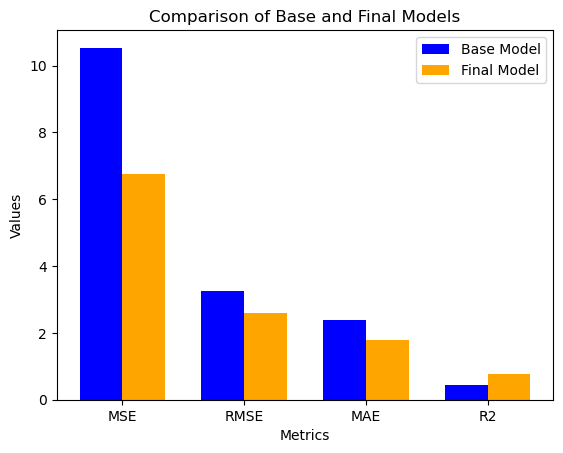

In [ ]:
# Create a bar plot
metric_labels = ['MSE', 'RMSE', 'MAE', 'R2']
final_model_metrics = [mse1, rmse1, mae1, r21]
base_model_metrics = [mse, rmse, mae, r2]
# Bar plot
bar_width = 0.35
index = np.arange(len(metric_labels))

plt.bar(index, base_model_metrics, bar_width, label='Base Model', color='blue')
plt.bar(index + bar_width, final_model_metrics, bar_width, label='Final Model', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Base and Final Models')
plt.xticks(index + bar_width / 2, metric_labels)
plt.legend()

plt.show()